In [1]:
%run -i ch03.py

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X, y = train
X_, y_ = shuffled
X.shape, y.shape

((60000, 784), (60000,))

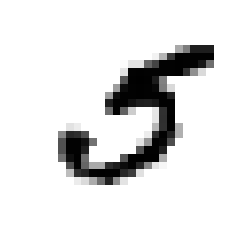

In [3]:
visualize_mnist(train, 36000)

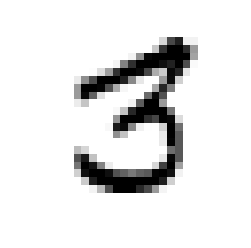

In [4]:
visualize_mnist(shuffled, 36000)

In [5]:
y[36000], y_[36000]

(5, 3)

In [6]:
y_train = (y_ == 5)
y_test = (test[1] == 5)

from sklearn.linear_model import SGDClassifier
from evaluation import EvaluateClassifier as EC

ec = EC(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
ec.run(X_, y_train, cv=3)

2019-02-03 21:38:13 ml           INFO     SGDClassifier
2019-02-03 21:38:13 ml           INFO     ==========
2019-02-03 21:38:13 ml           INFO     ('Confusion Matrix:', array([[52235,  2344],
       [ 1024,  4397]]))
2019-02-03 21:38:13 ml           INFO     ('P/R', ['0.65', '0.81', '0.72'])
2019-02-03 21:38:13 ml           INFO     --------




In [7]:
prec, rec, thresh = ec.pc_curve(X_, y_train, cv=3, method='decision_function')
plt.plot(thresh, prec[:-1], 'b--', label="Precision")
plt.plot(thresh, rec[:-1], 'b--', label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])
plt.show()

(60000, 784) (60000,)


ValueError: multiclass-multioutput format is not supported